In [77]:
# Installing Library's

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#!pip install fredapi
import plotly.express as px
import time

plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

fred_key = '230ba16be609639de5ee528471a0f168'

In [2]:
# Creating The Fred Object

fred = Fred(api_key=fred_key)

In [3]:
# Searching for Econimic Data

fred_sp = fred.search('S&P', order_by = 'popularity')

In [4]:
fred_sp.head()

id realtime_start realtime_end  \
series id                                                    
BAMLH0A0HYM2      BAMLH0A0HYM2     2023-02-08   2023-02-08   
CSUSHPINSA          CSUSHPINSA     2023-02-08   2023-02-08   
BAMLH0A0HYM2EY  BAMLH0A0HYM2EY     2023-02-08   2023-02-08   
SP500                    SP500     2023-02-08   2023-02-08   
CSUSHPISA            CSUSHPISA     2023-02-08   2023-02-08   

                                                            title  \
series id                                                           
BAMLH0A0HYM2    ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA        S&P/Case-Shiller U.S. National Home Price Index   
BAMLH0A0HYM2EY       ICE BofA US High Yield Index Effective Yield   
SP500                                                     S&P 500   
CSUSHPISA         S&P/Case-Shiller U.S. National Home Price Index   

               observation_start observation_end     frequency  \
series id                                                        
BAMLH0A0HYM2          1996-12-31      2023-02-07  Daily, Close   
CSUSHPINSA            1987-01-01      2022-11-01       Monthly   
BAMLH0A0HYM2EY        1996-12-31      2023-02-07  Daily, Close   
SP500                 2013-02-08      2023-02-07  Daily, Close   
CSUSHPISA             1987-01-01      2022-11-01       Monthly   

               frequency_short               units         units_short  \
series id                                                                
BAMLH0A0HYM2                 D             Percent                   %   
CSUSHPINSA                   M  Index Jan 2000=100  Index Jan 2000=100   
BAMLH0A0HYM2EY               D             Percent                   %   
SP500                        D               Index               Index   
CSUSHPISA                    M  Index Jan 2000=100  Index Jan 2000=100   

                    seasonal_adjustment seasonal_adjustment_short  \
series id                                                           
BAMLH0A0HYM2    Not Seasonally Adjusted                       NSA   
CSUSHPINSA      Not Seasonally Adjusted                       NSA   
BAMLH0A0HYM2EY  Not Seasonally Adjusted                       NSA   
SP500           Not Seasonally Adjusted                       NSA   
CSUSHPISA           Seasonally Adjusted                        SA   

                             last_updated popularity  \
series id                                              
BAMLH0A0HYM2    2023-02-08 08:36:14-06:00         94   
CSUSHPINSA      2023-01-31 08:01:02-06:00         90   
BAMLH0A0HYM2EY  2023-02-08 08:36:18-06:00         84   
SP500           2023-02-07 19:10:49-06:00         84   
CSUSHPISA       2023-01-31 08:01:04-06:00         82   

                                                            notes  
series id                                                          
BAMLH0A0HYM2    The ICE BofA Option-Adjusted Spreads (OASs) ar...  
CSUSHPINSA      For more information regarding the index, plea...  
BAMLH0A0HYM2EY  This data represents the effective yield of th...  
SP500           The observations for the S&P 500 represent the...  
CSUSHPISA       For more information regarding the index, plea...

In [5]:
# Pulling Raw Data & Plotting

sp500 = fred.get_series(series_id= 'SP500')

<AxesSubplot:title={'center':'S&P 500'}>

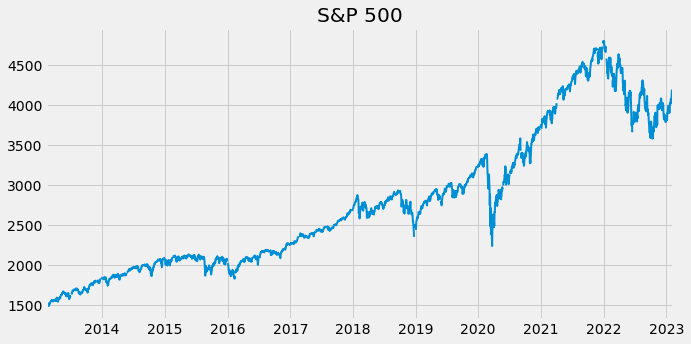

In [6]:
sp500.plot(figsize=(10, 5), title = 'S&P 500', lw=2)

In [7]:
# Pull and Join Multiple Data Series

uemp_results = fred.search('unemployment')

In [8]:
uemp_results.head()

id realtime_start realtime_end  \
series id                                          
UNRATE        UNRATE     2023-02-08   2023-02-08   
UNRATENSA  UNRATENSA     2023-02-08   2023-02-08   
NROU            NROU     2023-02-08   2023-02-08   
UNEMPLOY    UNEMPLOY     2023-02-08   2023-02-08   
CCSA            CCSA     2023-02-08   2023-02-08   

                                             title observation_start  \
series id                                                              
UNRATE                           Unemployment Rate        1948-01-01   
UNRATENSA                        Unemployment Rate        1948-01-01   
NROU              Noncyclical Rate of Unemployment        1949-01-01   
UNEMPLOY                        Unemployment Level        1948-01-01   
CCSA       Continued Claims (Insured Unemployment)        1967-01-07   

          observation_end                frequency frequency_short  \
series id                                                            
UNRATE         2023-01-01                  Monthly               M   
UNRATENSA      2023-01-01                  Monthly               M   
NROU           2032-10-01                Quarterly               Q   
UNEMPLOY       2023-01-01                  Monthly               M   
CCSA           2023-01-21  Weekly, Ending Saturday               W   

                          units        units_short      seasonal_adjustment  \
series id                                                                     
UNRATE                  Percent                  %      Seasonally Adjusted   
UNRATENSA               Percent                  %  Not Seasonally Adjusted   
NROU                    Percent                  %  Not Seasonally Adjusted   
UNEMPLOY   Thousands of Persons  Thous. of Persons      Seasonally Adjusted   
CCSA                     Number             Number      Seasonally Adjusted   

          seasonal_adjustment_short               last_updated popularity  \
series id                                                                   
UNRATE                           SA  2023-02-03 07:44:02-06:00         95   
UNRATENSA                       NSA  2023-02-03 07:43:02-06:00         59   
NROU                            NSA  2022-05-26 13:45:04-05:00         69   
UNEMPLOY                         SA  2023-02-03 07:44:05-06:00         70   
CCSA                             SA  2023-02-02 11:36:03-06:00         72   

                                                       notes  
series id                                                     
UNRATE     The unemployment rate represents the number of...  
UNRATENSA  The unemployment rate represents the number of...  
NROU       Starting with the July, 2021 report: An Update...  
UNEMPLOY   The series comes from the 'Current Population ...  
CCSA       Continued claims, also referred to as insured ...

In [9]:
unrate = fred.get_series('UNRATE')

<AxesSubplot:>

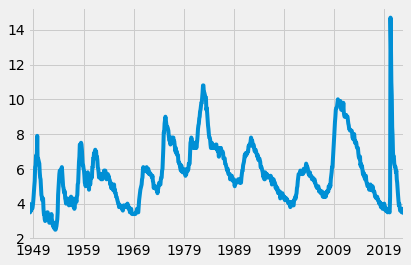

In [10]:
unrate.plot()

In [11]:
unemp_df = fred.search('unemployment rate state', filter = ('frequency', 'Monthly'))

In [12]:
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent" and observation_start >= "1976-01-01"')

In [13]:
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [14]:
unemp_df

id realtime_start realtime_end  \
series id                                              
CAUR                CAUR     2023-02-08   2023-02-08   
FLUR                FLUR     2023-02-08   2023-02-08   
TXUR                TXUR     2023-02-08   2023-02-08   
NYUR                NYUR     2023-02-08   2023-02-08   
LNS14027662  LNS14027662     2023-02-08   2023-02-08   
...                  ...            ...          ...   
CNERUR            CNERUR     2023-02-08   2023-02-08   
VTUR                VTUR     2023-02-08   2023-02-08   
CSOUUR            CSOUUR     2023-02-08   2023-02-08   
CWSTUR            CWSTUR     2023-02-08   2023-02-08   
CNEWUR            CNEWUR     2023-02-08   2023-02-08   

                                                         title  \
series id                                                        
CAUR                           Unemployment Rate in California   
FLUR                              Unemployment Rate in Florida   
TXUR                                Unemployment Rate in Texas   
NYUR                             Unemployment Rate in New York   
LNS14027662  Unemployment Rate - Bachelor's Degree and High...   
...                                                        ...   
CNERUR            Unemployment Rate in Northeast Census Region   
VTUR                              Unemployment Rate in Vermont   
CSOUUR                Unemployment Rate in South Census Region   
CWSTUR                 Unemployment Rate in West Census Region   
CNEWUR        Unemployment Rate in New England Census Division   

            observation_start observation_end frequency frequency_short  \
series id                                                                 
CAUR               1976-01-01      2022-12-01   Monthly               M   
FLUR               1976-01-01      2022-12-01   Monthly               M   
TXUR               1976-01-01      2022-12-01   Monthly               M   
NYUR               1976-01-01      2022-12-01   Monthly               M   
LNS14027662        1992-01-01      2023-01-01   Monthly               M   
...                       ...             ...       ...             ...   
CNERUR             1976-01-01      2022-12-01   Monthly               M   
VTUR               1976-01-01      2022-12-01   Monthly               M   
CSOUUR             1976-01-01      2022-12-01   Monthly               M   
CWSTUR             1976-01-01      2022-12-01   Monthly               M   
CNEWUR             1976-01-01      2022-12-01   Monthly               M   

               units units_short  seasonal_adjustment  \
series id                                               
CAUR         Percent           %  Seasonally Adjusted   
FLUR         Percent           %  Seasonally Adjusted   
TXUR         Percent           %  Seasonally Adjusted   
NYUR         Percent           %  Seasonally Adjusted   
LNS14027662  Percent           %  Seasonally Adjusted   
...              ...         ...                  ...   
CNERUR       Percent           %  Seasonally Adjusted   
VTUR         Percent           %  Seasonally Adjusted   
CSOUUR       Percent           %  Seasonally Adjusted   
CWSTUR       Percent           %  Seasonally Adjusted   
CNEWUR       Percent           %  Seasonally Adjusted   

            seasonal_adjustment_short               last_updated popularity  \
series id                                                                     
CAUR                               SA  2023-01-25 08:27:02-06:00         58   
FLUR                               SA  2023-01-25 08:27:02-06:00         51   
TXUR                               SA  2023-01-25 08:26:03-06:00         49   
NYUR                               SA  2023-01-25 08:26:02-06:00         46   
LNS14027662                        SA  2023-02-03 07:44:24-06:00         41   
...                               ...                        ...        ...   
CNERUR                             SA  2023-01-25 08:26:27-06:00          3   
VTUR 

In [15]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)

In [17]:
unemp_results = pd.concat(all_results, axis=1)
unemp_results = unemp_results.drop(['LNS14027662', 'LNS14027660','LNS14032183', 
                                    'LASMT261982000000003','LNS14027659', 'LASMT391746000000003', 'LNS14027689', 
                                    'CMWRUR','CNERUR','CWSTUR','CSOUUR','CNEWUR'], axis =1) 

unemp_states = unemp_results.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in', '').to_dict()
unemp_states.columns = [id_to_state[c] for c in unemp_states.columns]
unemp_states



California   Florida   Texas   New York   Ohio   Pennsylvania  \
1976-01-01          9.2       9.7     5.8       10.3    8.1            8.0   
1976-02-01          9.2       9.7     5.8       10.3    8.1            8.1   
1976-03-01          9.1       9.6     5.9       10.2    8.1            8.1   
1976-04-01          9.1       9.5     5.9       10.2    8.0            8.1   
1976-05-01          9.0       9.3     5.9       10.1    7.8            8.1   
...                 ...       ...     ...        ...    ...            ...   
2022-04-01          4.6       3.0     4.3        4.5    4.0            4.8   
2022-05-01          4.3       2.9     4.2        4.4    3.9            4.6   
2022-06-01          4.2       2.8     4.1        4.4    3.9            4.5   
2022-07-01          3.9       2.7     4.0        4.3    3.9            4.3   
2022-08-01          4.1       2.7     4.1        4.7    4.0            4.2   

             Michigan   North Carolina   Illinois   Georgia   Wisconsin  \
1976-01-01        9.9              6.4        6.6       8.4         5.8   
1976-02-01        9.9              6.4        6.6       8.4         5.8   
1976-03-01        9.9              6.4        6.6       8.4         5.7   
1976-04-01        9.8              6.3        6.6       8.3         5.6   
1976-05-01        9.6              6.1        6.6       8.1         5.5   
...               ...              ...        ...       ...         ...   
2022-04-01        4.3              3.4        4.6       3.1         2.8   
2022-05-01        4.3              3.4        4.6       3.0         2.9   
2022-06-01        4.3              3.4        4.5       2.9         2.9   
2022-07-01        4.2              3.4        4.4       2.8         3.0   
2022-08-01        4.1              3.5        4.5       2.8         3.1   

             Alabama   New Jersey   Colorado   Virginia   Tennessee  \
1976-01-01       6.6         10.3        5.8        6.1         6.0   
1976-02-01       6.6         10.3        5.7        6.1         6.0   
1976-03-01       6.6         10.3        5.7        6.1         6.0   
1976-04-01       6.5         10.3        5.6        6.0         6.0   
1976-05-01       6.4         10.3        5.6        5.9         5.9   
...              ...          ...        ...        ...         ...   
2022-04-01       2.8          4.1        3.6        3.0         3.2   
2022-05-01       2.7          3.9        3.5        3.0         3.3   
2022-06-01       2.6          3.9        3.4        2.8         3.3   
2022-07-01       2.6          3.7        3.3        2.7         3.3   
2022-08-01       2.6          4.0        3.4        2.6         3.4   

             Minnesota   Massachusetts   Arizona   Kentucky   Missouri  \
1976-01-01         6.0            10.5      10.2        5.6        5.9   
1976-02-01         6.0            10.5      10.2        5.6        5.9   
1976-03-01         5.9            10.5      10.1        5.6        5.9   
1976-04-01         5.8            10.3      10.0        5.6        6.0   
1976-05-01         5.7            10.1       9.8        5.5        6.0   
...                ...             ...       ...        ...        ...   
2022-04-01         2.2             4.1       3.2        3.9        3.4   
2022-05-01         2.0             3.9       3.2        3.8        3.1   
2022-06-01         1.8             3.7       3.3        3.7        2.8   
2022-07-01         1.8             3.5       3.3        3.7        2.5   
2022-08-01         1.9             3.6       3.5        3.8        2.5   

             Washington   West Virginia   Indiana   Arkansas   Iowa  \
1976-01-01          8.5             7.5       6.6        7.3    4.3   
1976-02-01          8.5             7.5       6.6        7.3    4.3   
1976-03-01          8.4             7.5       6.5        7.3    4.3   
1976-04-01          8.5             7.5       6.3        7.2    4.2   
1976-05-01          8.5             7.4       6.0        7.1    4.1   
...    

In [18]:
# Plot States Unemployment Rate

px.line(unemp_states)

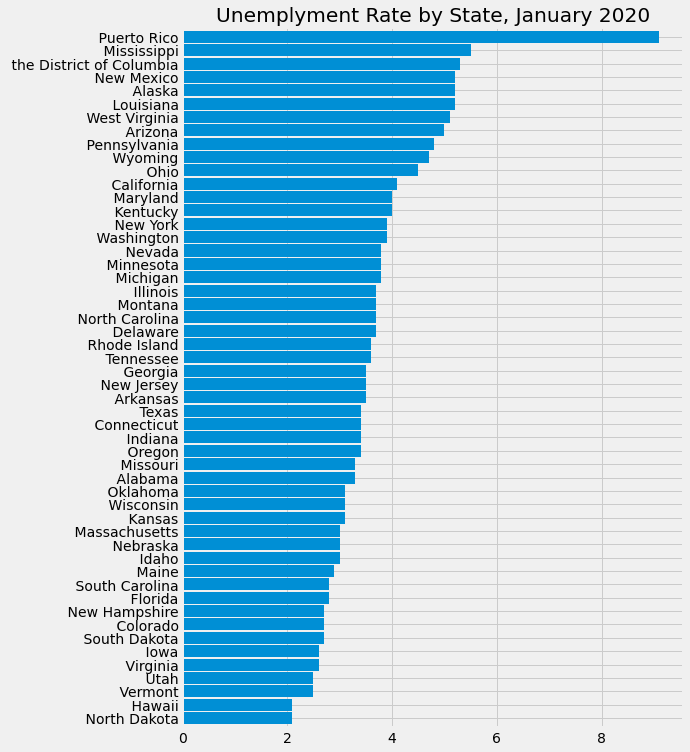

In [19]:
# Pull April 2020 Unemployment Rate Per State

ax = unemp_states.loc[unemp_states.index == '2020-01-01'].T.sort_values('2020-01-01').plot(kind='barh', figsize=(8,12),
                width=0.9, title = 'Unemplyment Rate by State, January 2020')

ax.legend().remove()
plt.show()

In [20]:
# Pulling Participaction Rate

part_df = fred.search('participation rate state', filter=('frequency', 'Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent" and observation_start >= "1976-01-01"')


In [35]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ', '').to_dict()

all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    
part_states = pd.concat(all_results, axis=1)
part_states

LNS11327662  LBSSA06  LBSSA12  LNS11327660  LBSSA01  LBSSA55  \
1976-01-01          NaN     62.6     55.8          NaN     57.0     65.6   
1976-02-01          NaN     62.4     55.7          NaN     56.9     65.5   
1976-03-01          NaN     62.2     55.5          NaN     56.8     65.4   
1976-04-01          NaN     62.2     55.5          NaN     56.8     65.4   
1976-05-01          NaN     62.3     55.4          NaN     56.8     65.5   
...                 ...      ...      ...          ...      ...      ...   
2022-09-01         72.9     62.3     59.5         56.2     57.2     65.6   
2022-10-01         72.7     62.3     59.6         55.9     57.2     65.3   
2022-11-01         72.5     62.2     59.5         55.7     57.1     64.9   
2022-12-01         72.7     62.1     59.5         56.2     57.0     64.7   
2023-01-01         72.7      NaN      NaN         56.4      NaN      NaN   

            LBSSA21  LBSSA48  LBSSA39  LBSSA36  LBSSA27  LNS11327659  LBSSA26  \
1976-01-01     60.5     63.8     61.7     58.0     65.6          NaN     61.6   
1976-02-01     60.3     63.5     61.7     58.0     65.5          NaN     61.5   
1976-03-01     60.2     63.4     61.7     58.0     65.4          NaN     61.5   
1976-04-01     60.1     63.5     61.6     58.0     65.4          NaN     61.6   
1976-05-01     60.1     63.6     61.6     58.1     65.5          NaN     61.7   
...             ...      ...      ...      ...      ...          ...      ...   
2022-09-01     58.0     63.6     61.7     60.3     68.1         45.7     60.1   
2022-10-01     57.9     63.6     61.5     60.5     68.0         46.6     60.0   
2022-11-01     57.7     63.5     61.3     60.5     67.9         45.6     59.9   
2022-12-01     57.6     63.5     61.2     60.5     67.9         45.6     59.9   
2023-01-01      NaN      NaN      NaN      NaN      NaN         46.0      NaN   

            LBSSA37  LBSSA08  LBSSA18  LBSSA13  LBSSA47  LBSSA17  LBSSA19  \
1976-01-01     66.5     67.2     64.0     63.7     59.6     63.0     64.4   
1976-02-01     66.3     67.0     63.9     63.6     59.4     63.0     64.3   
1976-03-01     66.2     66.8     63.8     63.5     59.3     62.9     64.2   
1976-04-01     66.2     66.6     63.8     63.5     59.3     62.9     64.1   
1976-05-01     66.3     66.5     63.9     63.6     59.4     63.0     64.1   
...             ...      ...      ...      ...      ...      ...      ...   
2022-09-01     60.6     69.4     63.4     62.0     60.5     64.5     67.7   
2022-10-01     60.5     69.4     63.3     61.8     60.1     64.4     67.7   
2022-11-01     60.4     69.2     63.2     61.7     59.6     64.3     67.7   
2022-12-01     60.3     69.0     63.2     61.5     59.2     64.3     67.6   
2023-01-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

            LRAC64TTUSM156S  LBSSA49  LBSSA23  LBSSA40  LBSSA45  LBSSA25  \
1976-01-01              NaN     62.8     62.1     59.3     65.3     64.8   
1976-02-01              NaN     62.6     61.9     59.2     65.2     64.7   
1976-03-01              NaN     62.5     61.9     59.1     65.0     64.6   
1976-04-01              NaN     62.5     61.8     59.0     64.9     64.6   
1976-05-01              NaN     62.6     61.7     59.0     64.7     64.6   
...                     ...      ...      ...      ...      ...      ...   
2022-09-01        74.072076     68.0     58.4     60.6     56.9     65.6   
2022-10-01        73.973329     67.9     58.3     60.6     56.7     65.5   
2022-11-01        74.004527     67.9     58.0     60.5     56.4     65.3   
2022-12-01        74.150217     68.1     57.9     60.5     56.3     65.1   
2023-01-01              NaN      NaN      NaN      NaN      NaN      NaN   

            LBSSA35  LNS11327689  LRAC55TTUSM156S  LBSSA32  LBSSA24  LBSSA30  \
1976-01-01     60.8          NaN              NaN     71.3     64.3     62.7   
1976-02-01     60.5          NaN              NaN     70.8     64.2     62.5   
1976-03-01     60.3          NaN              Na

In [36]:
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

In [37]:
part_states.columns

Index(['Labor Force Participation Rate - Bachelor's Degree and Higher, 25 Yrs. & over',
       'California', 'Florida',
       'Labor Force Participation Rate - High School Graduates, No College, 25 Yrs. & over',
       'Alabama', 'Wisconsin', 'Kentucky', 'Texas', 'Ohio', 'New York',
       'Minnesota',
       'Labor Force Participation Rate - Less Than a High School Diploma, 25 Yrs. & over',
       'Michigan', 'North Carolina', 'Colorado', 'Indiana', 'Georgia',
       'Tennessee', 'Illinois', 'Iowa',
       'Activity Rate: Aged 15-64: All Persons for the United States', 'Utah',
       'Maine', 'Oklahoma', 'South Carolina', 'Massachusetts', 'New Mexico',
       'Labor Force Participation Rate - Some College or Associate Degree, 25 Yrs. & over',
       'Activity Rate: Aged 55-64: All Persons for the United States',
       'Nevada', 'Maryland', 'Montana', 'Nebraska', 'West Virginia',
       'Pennsylvania', 'Virginia', 'New Jersey', 'Oregon',
       'Inactivity Rate: Aged 15-64: All Perso

In [39]:
part_states = part_states.drop(["Labor Force Participation Rate - Bachelor's Degree and Higher, 25 Yrs. & over", 
                                'Labor Force Participation Rate - High School Graduates, No College, 25 Yrs. & over',
                         'Labor Force Participation Rate - Less Than a High School Diploma, 25 Yrs. & over',
                         'Activity Rate: Aged 15-64: All Persons for the United States',
                         'Labor Force Participation Rate - Some College or Associate Degree, 25 Yrs. & over',
                         'Activity Rate: Aged 55-64: All Persons for the United States',
                         'Inactivity Rate: Aged 15-64: All Persons for the United States',
                         'Inactivity Rate: Aged 25-54: Males for the United States',
                         'Activity Rate: Aged 55-64: Males for the United States',
                         'Activity Rate: Aged 55-64: Females for the United States',
                           'Inactivity Rate: Aged 55-64: Females for the United States',
                           'Inactivity Rate: Aged 55-64: Males for the United States',
                           'Activity Rate: Aged 15-64: Females for the United States',
                           'Inactivity Rate: Aged 15-24: Males for the United States',
                           'Inactivity Rate: Aged 25-54: All Persons for the United States',
                           'Inactivity Rate: Aged 15-74: All Persons for the United States',
                           'Inactivity Rate: Aged 25-54: Females for the United States',
                           'Inactivity Rate: Aged 15-24: Females for the United States',
                           'Activity Rate: Aged 15-74: Males for the United States',
                           'Inactivity Rate: Aged 15-74: Females for the United States',
                           'Activity Rate: Aged 15-74: Females for the United States',
                           'Inactivity Rate: Aged 15-74: Males for the United States',
                           'Activity Rate: Aged 15-64: Males for the United States',
                           'Inactivity Rate: Aged 15-64: Females for the United States',
                           'Inactivity Rate: Aged 15-64: Males for the United States',
                           'Activity Rate: Aged 15-74: All Persons for the United States',
                           'Inactivity Rate: Aged 55-64: All Persons for the United States',
                           'Inactivity Rate: Aged 15-24: All Persons for the United States'], axis =1)

In [40]:
part_states

California  Florida  Alabama  Wisconsin  Kentucky  Texas  Ohio  \
1976-01-01        62.6     55.8     57.0       65.6      60.5   63.8  61.7   
1976-02-01        62.4     55.7     56.9       65.5      60.3   63.5  61.7   
1976-03-01        62.2     55.5     56.8       65.4      60.2   63.4  61.7   
1976-04-01        62.2     55.5     56.8       65.4      60.1   63.5  61.6   
1976-05-01        62.3     55.4     56.8       65.5      60.1   63.6  61.6   
...                ...      ...      ...        ...       ...    ...   ...   
2022-09-01        62.3     59.5     57.2       65.6      58.0   63.6  61.7   
2022-10-01        62.3     59.6     57.2       65.3      57.9   63.6  61.5   
2022-11-01        62.2     59.5     57.1       64.9      57.7   63.5  61.3   
2022-12-01        62.1     59.5     57.0       64.7      57.6   63.5  61.2   
2023-01-01         NaN      NaN      NaN        NaN       NaN    NaN   NaN   

            New York  Minnesota  Michigan  North Carolina  Colorado  Indiana  \
1976-01-01      58.0       65.6      61.6            66.5      67.2     64.0   
1976-02-01      58.0       65.5      61.5            66.3      67.0     63.9   
1976-03-01      58.0       65.4      61.5            66.2      66.8     63.8   
1976-04-01      58.0       65.4      61.6            66.2      66.6     63.8   
1976-05-01      58.1       65.5      61.7            66.3      66.5     63.9   
...              ...        ...       ...             ...       ...      ...   
2022-09-01      60.3       68.1      60.1            60.6      69.4     63.4   
2022-10-01      60.5       68.0      60.0            60.5      69.4     63.3   
2022-11-01      60.5       67.9      59.9            60.4      69.2     63.2   
2022-12-01      60.5       67.9      59.9            60.3      69.0     63.2   
2023-01-01       NaN        NaN       NaN             NaN       NaN      NaN   

            Georgia  Tennessee  Illinois  Iowa  Utah  Maine  Oklahoma  \
1976-01-01     63.7       59.6      63.0  64.4  62.8   62.1      59.3   
1976-02-01     63.6       59.4      63.0  64.3  62.6   61.9      59.2   
1976-03-01     63.5       59.3      62.9  64.2  62.5   61.9      59.1   
1976-04-01     63.5       59.3      62.9  64.1  62.5   61.8      59.0   
1976-05-01     63.6       59.4      63.0  64.1  62.6   61.7      59.0   
...             ...        ...       ...   ...   ...    ...       ...   
2022-09-01     62.0       60.5      64.5  67.7  68.0   58.4      60.6   
2022-10-01     61.8       60.1      64.4  67.7  67.9   58.3      60.6   
2022-11-01     61.7       59.6      64.3  67.7  67.9   58.0      60.5   
2022-12-01     61.5       59.2      64.3  67.6  68.1   57.9      60.5   
2023-01-01      NaN        NaN       NaN   NaN   NaN    NaN       NaN   

            South Carolina  Massachusetts  New Mexico  Nevada  Maryland  \
1976-01-01            65.3           64.8        60.8    71.3      64.3   
1976-02-01            65.2           64.7        60.5    70.8      64.2   
1976-03-01            65.0           64.6        60.3    70.5      64.1   
1976-04-01            64.9           64.6        60.3    70.4      64.1   
1976-05-01            64.7           64.6        60.3    70.5      64.1   
...                    ...            ...         ...     ...       ...   
2022-09-01            56.9           65.6        56.3    60.6      65.7   
2022-10-01            56.7           65.5        56.1    60.9      65.9   
2022-11-01            56.4           65.3        55.9    61.1      65.6   
2022-12-01            56.3           65.1        55.7    61.2      65.3   
2023-01-01             NaN            NaN         NaN     NaN       NaN   

            Montana  Nebraska  West Virginia  Pennsylvania  Virginia  \
1976-01-01     62.7      64.9           52.5          58.4      65.9   
1976-02-01     62.5      64.9           52.4          58.3      65.8   
1976-03-01     62.4      64.8           52.3          58.3      65.6   
1976-04-01     62.3      64.8           52.3    

In [73]:
unemp_states.columns = unemp_states.columns.str.lstrip()
#unemp_states = unemp_states.drop(['Puerto Rico'], axis = 1)
unemp_states = unemp_states.rename(columns={'District of Columbia': 'District Of Columbia'})
unemp_states.columns

Index(['California', 'Florida', 'Texas', 'New York', 'Ohio', 'Pennsylvania',
       'Michigan', 'North Carolina', 'Illinois', 'Georgia', 'Wisconsin',
       'Alabama', 'New Jersey', 'Colorado', 'Virginia', 'Tennessee',
       'Minnesota', 'Massachusetts', 'Arizona', 'Kentucky', 'Missouri',
       'Washington', 'West Virginia', 'Indiana', 'Arkansas', 'Iowa',
       'South Carolina', 'Louisiana', 'New Mexico', 'Oklahoma', 'Utah',
       'Maryland', 'Nevada', 'Oregon', 'Mississippi', 'Kansas', 'Montana',
       'Alaska', 'Hawaii', 'Connecticut', 'Nebraska', 'South Dakota', 'Maine',
       'North Dakota', 'District Of Columbia', 'Idaho', 'New Hampshire',
       'Wyoming', 'Rhode Island', 'Delaware', 'Vermont'],
      dtype='object')

In [66]:
part_states.columns

Index(['California', 'Florida', 'Alabama', 'Wisconsin', 'Kentucky', 'Texas',
       'Ohio', 'New York', 'Minnesota', 'Michigan', 'North Carolina',
       'Colorado', 'Indiana', 'Georgia', 'Tennessee', 'Illinois', 'Iowa',
       'Utah', 'Maine', 'Oklahoma', 'South Carolina', 'Massachusetts',
       'New Mexico', 'Nevada', 'Maryland', 'Montana', 'Nebraska',
       'West Virginia', 'Pennsylvania', 'Virginia', 'New Jersey', 'Oregon',
       'Arizona', 'Kansas', 'Louisiana', 'Washington', 'Arkansas',
       'Mississippi', 'South Dakota', 'Connecticut', 'Wyoming', 'Missouri',
       'Alaska', 'Idaho', 'Vermont', 'New Hampshire', 'Hawaii', 'North Dakota',
       'Rhode Island', 'Delaware', 'District Of Columbia'],
      dtype='object')

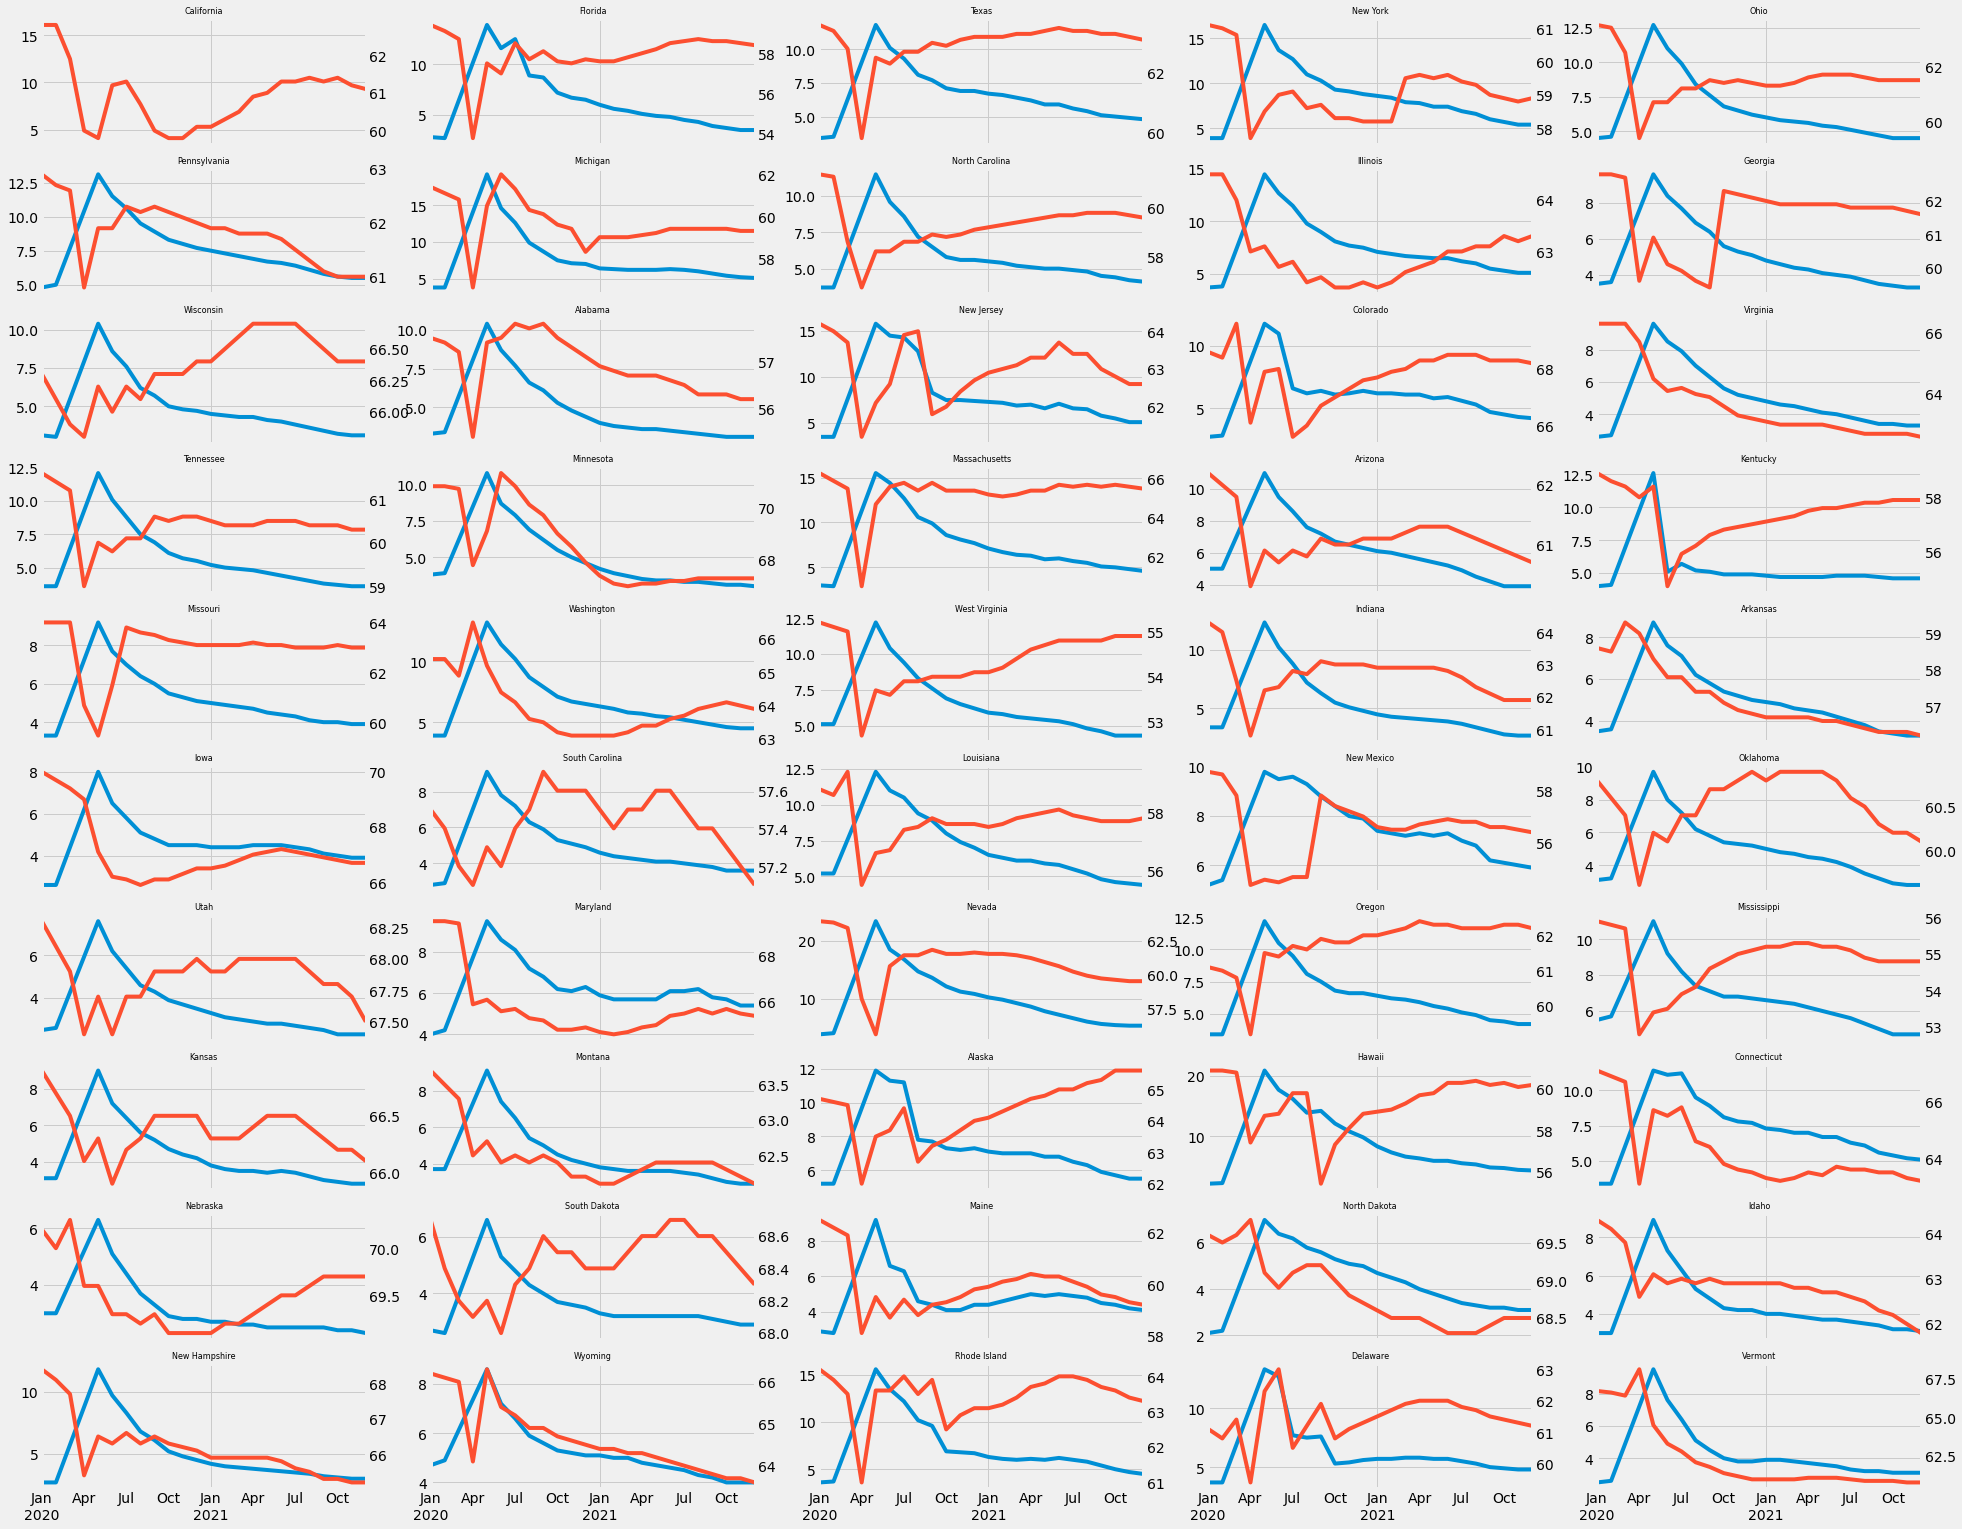

In [78]:
# Ploting Unemployment vs Participation

fig, axs = plt.subplots(10, 5, figsize=(30,30), sharex=True)
axs = axs.flatten()

i=0
for state in unemp_states.columns:
    if state == "District Of Columbia":
        continue
    ax2 = axs[i].twinx()
    unemp_states.query('index >= 2020 and index < 2022')[state].plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2022')[state].plot(ax=ax2, label='Participation', color = color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state, fontsize=8)
    i += 1
plt.tight_layout
plt.show()